In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Gensim
from gensim.corpora.dictionary import Dictionary

IMPORT DATA

In [2]:
df = pd.read_csv('bow_df.csv')
# 결측치 제거
df = df.dropna()

company_name = df.company_name
company_name.to_csv("company_name.csv")
other_var = df.drop(['company_name','adv','dadv','Unnamed: 0'],axis=1)
other_var.to_csv("other_var.csv")

불용어 처리

In [3]:
import re

def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]',' ', string=text)
    text = re.sub('\n', '.', string=text)
    return text 

In [4]:
df['adv'] = df['adv'].apply(clean_str)
df['dadv'] = df['dadv'].apply(clean_str)
df

,Unnamed: 0,company_name,adv,dadv,average_salary,total_sale,turn_over_rate
0,0,국민건강보험공단,휴직 종류가 다양하지 못하나 임신출산관련해서는 잘 정리된듯하다 분위기는 지사마다 ...,악성민원 진상민원을 매일 매일 마주해야한다 개편때마다 퇴사자 생기는거 보면 말다함...,6441,75400.0,0.20
1,1,근로복지공단,탄력근무 복지포인트 등 직원들의 복지 계약직도 해당 1 재택근무를 쓸 수 있다...,위탁집행형 기관 치고 급여가 적음 정규직들의 최대 불만 그래서 건보 연금 등으로 ...,5817,9406.2,0.13
2,3,농협은행,업무 강도에 비해 높은 연봉 워라밸 정년보장 젊은 분위기 등 장점이 많은 회사...,다수 보수적인 문화가 여전히 잔재하고 있음 어르신들도 많은 회사 성격좋은 윗 상급...,6182,13100.0,0.15
3,4,현대카드,일단 오피스 환경이 쾌적한것은 장점대기업만의 성과급이나 복지의 혜택등이 좋다생각보다...,꼰대문화 부서에따라 존재 굽신굽신 매일 퇴근은 정시에 포기 할일 다하면 다른업무...,8737,2300.0,0.35
4,5,중소기업은행,5일 연차 사용가능 지바지 있을 수 있지만 훌륭한 선배들이 많음 지바지 사바사지...,느린 전산 사람 상대하는 직업이다보니 사람에 대한 스트레스가 많음 서비스직이다보니...,10065,14800.0,0.16
...,...,...,...,...,...,...,...
2498,212,유끼커뮤니케이션,연차 자유롭게 사용 가능함다양한 업무를 진행해볼 수 있는 곳 퇴근 시간이 칼 같이 ...,복지 제도의 부족함 느낌타이트한 업무 데드라인이 있을 때가 많음 사무실이 비교적 좁...,4417,28.0,0.14
2499,213,투어이천,기업의 장점으로는 꼰대 문화는 거의 없고 팀바이 팀이라서 연차가 자유롭게 이용 가능...,단점은 너무나 많습니다 일단 회사인데 체계가 제대로 잡혀있지 않아서 일하기가 너무...,1314,108.9,1.36
2500,214,휴먼코아,팀보단 본인만 잘하면 별 문제없습니다 통근버스 식비 지원 쉬는시간 많습니다 연차...,단순노동이라 힘들고 체력적으로 많이 힘듭니다 화장실 가는게 쫌 눈치보일정도로 바쁘...,3062,430.1,1.00
2501,215,에이치엔씨네트워크,휴가 5개줌연차 돈으로 줌화장실 비데있음커피 차 있음일못해도 돈준다 연차 눈치안봐...,너무많아서 못쓰겠다 일하는 사람만 하고 안하는 사람은 안한다안하는 사람 루팡 개많다...,3038,336.9,0.68


정규화

In [5]:
from soynlp.normalizer import *

df['adv'] = [repeat_normalize(adv,num_repeats=2) for adv in df['adv']]
df['dadv'] = [repeat_normalize(dadv,num_repeats=2) for dadv in df['dadv']]

TOKENIZING

In [6]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if pos in ['Noun','Verb','Adjective'] and len(token)>1
    ]

In [7]:
text_adv = [my_tokenizer(text) for text in df.adv]
text_dadv = [my_tokenizer(text) for text in df.dadv]

In [8]:
dictionary_adv = Dictionary(text_adv)
dictionary_dadv = Dictionary(text_dadv)
print('#Number of initial unique words in adv_documents:',len(dictionary_adv))
print('#Number of initial unique words in dadv_documents:',len(dictionary_dadv))

dictionary_adv.filter_extremes(keep_n = 3000, no_below = 10, no_above = 0.5)
dictionary_dadv.filter_extremes(keep_n = 3000, no_below = 10, no_above = 0.5)

print("#Number of unique words after removing rae and common words:", len(dictionary_adv))
print("#Number of unique words after removing rae and common words:", len(dictionary_dadv))

corpus_adv = [dictionary_adv.doc2bow(text) for text in text_adv]
corpus_dadv = [dictionary_dadv.doc2bow(text) for text in text_dadv]
print('#Number of unique tokens: %d' % len(dictionary_adv))
print('#Number of documents: %d' % len(corpus_adv))

print('#Number of unique tokens: %d' % len(dictionary_dadv))
print('#Number of documents: %d' % len(corpus_dadv))


#Number of initial unique words in adv_documents: 44930
#Number of initial unique words in dadv_documents: 75700
#Number of unique words after removing rae and common words: 3000
#Number of unique words after removing rae and common words: 3000
#Number of unique tokens: 3000
#Number of documents: 2503
#Number of unique tokens: 3000
#Number of documents: 2503


In [9]:
import pickle
with open('corpus_adv.pkl', 'wb') as lf:
    pickle.dump(corpus_adv, lf)

In [10]:
with open('corpus_dadv.pkl', 'wb') as lf:
    pickle.dump(corpus_dadv, lf)

LDA MODEL

In [11]:
from gensim.models import LdaModel

num_topics_adv = 6
passes = 5
model_adv = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = num_topics_adv,random_state = 7)
model_adv.save("tp_adv_model")

In [12]:
num_topics_dadv = 7
model_dadv = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = num_topics_dadv,random_state = 7)
model_dadv.save("tp_dadv_model")

In [14]:
print('ADV')
print(model_adv.print_topics(num_words=10))
print('\n DADV')
print(model_dadv.print_topics(num_words=10))
# print('#topic distribution of the first document:',model.get_document_topics(corpus)[0])

ADV
[(0, '0.010*"점심" + 0.010*"높은" + 0.009*"포인트" + 0.008*"기숙사" + 0.008*"대기업" + 0.008*"저녁" + 0.008*"식당" + 0.007*"업계" + 0.007*"사내" + 0.007*"부바"'), (1, '0.009*"사내" + 0.009*"간식" + 0.008*"카페" + 0.008*"식대" + 0.008*"커피" + 0.008*"재택근무" + 0.007*"사무실" + 0.007*"건물" + 0.007*"동료" + 0.006*"출근"'), (2, '0.014*"할인" + 0.013*"대기업" + 0.009*"수당" + 0.006*"혜택" + 0.006*"안정" + 0.005*"열사" + 0.005*"구내식당" + 0.005*"지급" + 0.005*"그룹" + 0.005*"강도"'), (3, '0.009*"안정" + 0.008*"공공기관" + 0.008*"서울" + 0.007*"부바" + 0.006*"높은" + 0.006*"유연근무제" + 0.006*"강도" + 0.006*"정년" + 0.005*"육아휴직" + 0.005*"공기업"'), (4, '0.008*"점심" + 0.007*"버스" + 0.006*"수당" + 0.006*"밀리" + 0.006*"통근" + 0.006*"나옴" + 0.005*"식당" + 0.005*"강도" + 0.005*"명절" + 0.004*"구내식당"'), (5, '0.007*"교육" + 0.007*"기회" + 0.006*"재택근무" + 0.006*"본인" + 0.005*"개인" + 0.005*"영업" + 0.005*"업계" + 0.005*"체계" + 0.005*"따라" + 0.005*"노력"')]

 DADV
[(0, '0.009*"사업" + 0.008*"영업" + 0.007*"조직" + 0.006*"임원" + 0.006*"영진" + 0.005*"개발" + 0.005*"경영" + 0.005*"회의" + 0.005*"미래" + 0.004*"성장"'), (1, '0.011*"계약

TOPIC MODELING COMPARISON(based on # topics)

In [ ]:
# # topic_modeling csv file
# num_topic_list_adv = [9]
# num_topic_list_dadv = [7]

# save_adv = {}
# save_dadv = {}
# for i in num_topic_list_adv:
#     model = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = i,random_state = 7)
#     save_adv[i] = model.print_topics(num_words=8)

# for i in num_topic_list_dadv:
#     model = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = i,random_state = 7)
#     save_dadv[i] = model.print_topics(num_words=8)

# topic_adv_csv = pd.DataFrame.from_dict(save_adv, orient='index')
# topic_adv_csv.to_csv("adv_topic_selection.csv")

# topic_dadv_csv = pd.DataFrame.from_dict(save_dadv, orient='index')
# topic_dadv_csv.to_csv("dadv_topic_selection.csv")

TOPIC MODELING OUTPUT

In [15]:
output_df_adv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_adv):
    tmp = str(col)
    output_df_adv[tmp] = float(0)
output_df_adv.index = [i for i in range(len(output_df_adv))]


In [16]:
output_df_dadv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_dadv):
    tmp = str(col)
    output_df_dadv[tmp] = float(0)
output_df_dadv.index = [i for i in range(len(output_df_dadv))]


In [17]:
for i, dt in enumerate(model_adv.get_document_topics(corpus_adv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_adv.at[i,idx] = pt

In [18]:
for i, dt in enumerate(model_dadv.get_document_topics(corpus_dadv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_dadv.at[i,idx] = pt

In [19]:
# to csv file
output_df_adv.to_csv('adv_topic_modeling.csv')
output_df_dadv.to_csv('dadv_topic_modeling.csv')

In [20]:
from gensim.models import CoherenceModel

cm_adv = CoherenceModel(model= model_adv, corpus= corpus_adv, coherence= 'u_mass')
cm_dadv = CoherenceModel(model= model_dadv, corpus= corpus_dadv, coherence= 'u_mass')

coherence_adv = cm_adv.get_coherence()
coherence_dadv = cm_dadv.get_coherence()

print(coherence_adv)
print(coherence_dadv)

-0.9521680663035923
-0.7249260611283539


num_topics: 3, perplexity: -7.301, coherence: -0.696
num_topics: 4, perplexity: -7.298, coherence: -0.786
num_topics: 5, perplexity: -7.303, coherence: -0.812
num_topics: 6, perplexity: -7.308, coherence: -0.728
num_topics: 7, perplexity: -7.311, coherence: -0.741
num_topics: 8, perplexity: -7.320, coherence: -0.781
num_topics: 9, perplexity: -7.331, coherence: -0.815
num_topics: 10, perplexity: -7.342, coherence: -0.803
num_topics: 11, perplexity: -7.350, coherence: -0.805
num_topics: 12, perplexity: -7.359, coherence: -0.817
num_topics: 13, perplexity: -7.368, coherence: -0.824
num_topics: 14, perplexity: -7.379, coherence: -0.797
num_topics: 15, perplexity: -7.383, coherence: -0.800
num_topics: 16, perplexity: -7.389, coherence: -0.806


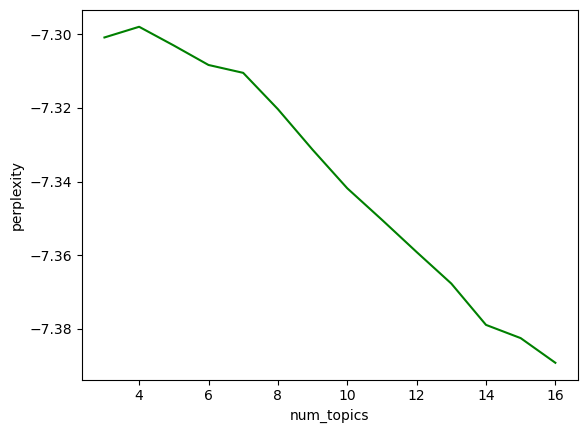

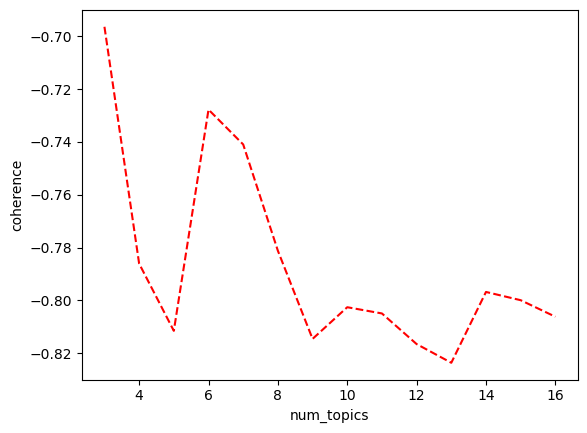

In [21]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize=1000, num_topics = i,random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
# 5, 14
show_coherence(corpus_adv, dictionary_adv, start = 3, end = 16)

num_topics: 3, perplexity: -7.480, coherence: -0.610
num_topics: 4, perplexity: -7.486, coherence: -0.631
num_topics: 5, perplexity: -7.490, coherence: -0.612
num_topics: 6, perplexity: -7.499, coherence: -0.645
num_topics: 7, perplexity: -7.509, coherence: -0.660
num_topics: 8, perplexity: -7.512, coherence: -0.664
num_topics: 9, perplexity: -7.522, coherence: -0.673
num_topics: 10, perplexity: -7.531, coherence: -0.665
num_topics: 11, perplexity: -7.538, coherence: -0.671
num_topics: 12, perplexity: -7.543, coherence: -0.664
num_topics: 13, perplexity: -7.552, coherence: -0.665
num_topics: 14, perplexity: -7.562, coherence: -0.670
num_topics: 15, perplexity: -7.563, coherence: -0.687
num_topics: 16, perplexity: -7.573, coherence: -0.671


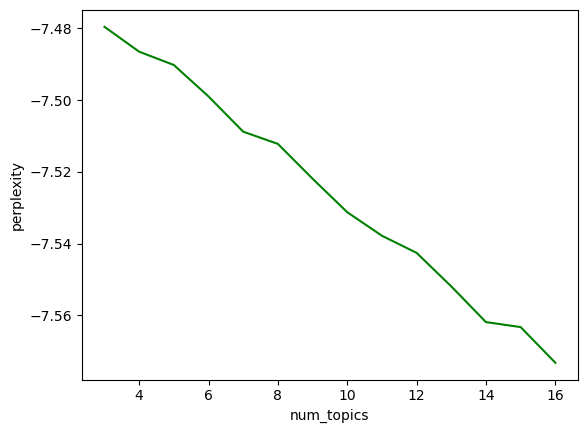

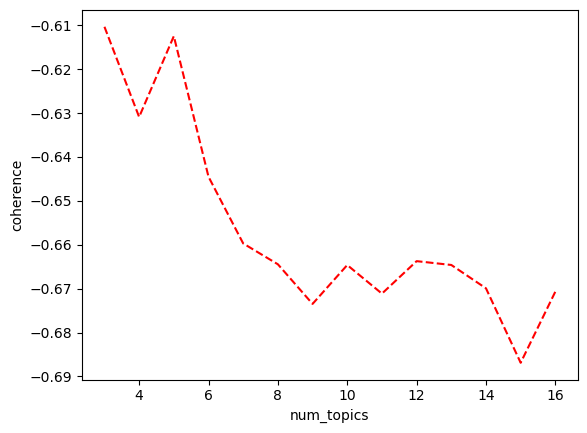

In [22]:
show_coherence(corpus_dadv, dictionary_dadv, start = 3, end = 16)
